# Demo:  Visualizing Kernels

SVMs are commonly used with kernels to enable non-linear classification.  In this demo, we show how to:

* Visualize kernel functions, particularly the radial basis function (RBF)
* Compute a kernel classifier and visualize its decision regions
* Describe an SVM classifier as a weighted kernel classifier
* Plot the decision function of the SVM 
* Visualize the role of the width in the kernel on the decision boundaries

We begin by importing common packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Kernels 

Kernel classifier and SVMs using the kernel method are based on a what is called a *kernel*.  A kernel is a function `K(x0,x)` that takes two feature vectors `x` and `x0`.  The kernel is generally selected such that:

*  `K(x0,x)` is highest when `x` and `x0` are close to one another
*  `K(x0,x) ~= 0` when `x` and `x0` are far from one another

Two common kernels are:

* Linear kernel:  `K(x0,x) = x0.dot(x)` 
* Radial basis function (RBF) kernel:  `K(x0,x) = exp(-gam*||x-x0||^2)`

To illustrate the kernel, we first look at the RBF kernel in 1D.  If `x0` and `x` are scalars and we fix `x0`, the RBF kernel as a function of `x` is a Gaussian bell curve centered at `x=x0` with width `1/gamma`.  We plot it for a few values to illustrate.

Text(0, 0.5, 'K(x0,x)')

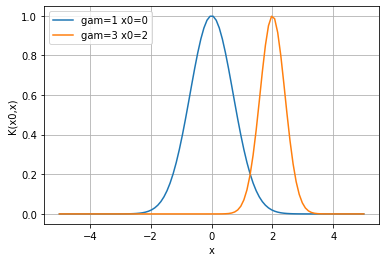

In [2]:
gam_plot = [1, 3]
x0_plot = [0,2]
x = np.linspace(-5,5,100)
leg_str = []
for gam, x0 in zip(gam_plot, x0_plot):
    ker = np.exp(-gam*(x-x0)**2)
    plt.plot(x, ker)
    leg = 'gam=%d x0=%d' % (gam, x0)
    leg_str.append(leg)
plt.grid()
plt.legend(leg_str)
plt.xlabel('x')
plt.ylabel('K(x0,x)')
    

We can also plot the RBF kernels in 2D for different parameters.  Again, we fix different values of `x0` and `gamma` and plot `K(x0,x)` as a function of `x`.  In this case, `x=[x[0],x[1]]` is 2D.  We see that `K(x0,x)` is at its peak at `x=x0`.  With higher `gamma` values it decreases faster away from the peak.

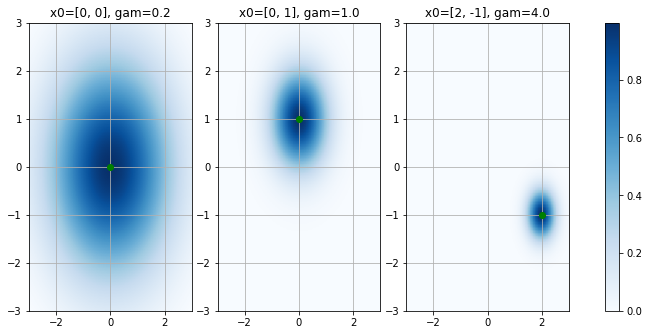

In [3]:
from matplotlib import cm

blue_map = cm.get_cmap('Blues')

# Get 2D points to plot
n0 = 100
n1 = 100
d = 2
xmax = 3
x0p = np.linspace(-xmax,xmax,n0)
x1p = np.linspace(-xmax,xmax,n1)
xmat = np.zeros((n1,n0,d))
xmat[:,:,0], xmat[:,:,1] = np.meshgrid(x0p, x1p)


# Plot for different gamma and x0
gam_plot = [0.2, 1, 4]
x0_plot = np.array([[0,0], [0,1], [2,-1]])
nplot = len(gam_plot)
fig, ax = plt.subplots(1,nplot, figsize=(10,5))
for igam, gam in enumerate(gam_plot):
    
    # Compute the kernel
    x0 = x0_plot[igam,:]
    dsq = np.sum((xmat-x0[None,None,:])**2, axis=2)
    ker = np.exp(-gam*dsq)

    # Plot the kernel
    im = ax[igam].imshow(np.flipud(ker), extent=[-xmax,xmax,-xmax,xmax],\
                                      aspect='auto', cmap=blue_map)  
    ax[igam].plot(x0[0], x0[1], 'go')
    ax[igam].grid()
    
    # Title
    title = 'x0=[%d, %d], gam=%3.1f' % (x0[0], x0[1], gam)
    ax[igam].set_title(title)
    
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.85) 
cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
plt.colorbar(im, cax=cb_ax)   

## Kernel Classifiers

To describe a kernel classifier, suppose we have training data `xtr[i], ytr[i]`, `i=0,...,ntr-1` with binary labels, `ytr[i] = -1` or `1`.  Given a kernel function `K(x1,x0)`, the *kernel classifier* classifies a new point `x` as:

     z = sum_i ytr[i]*K(xtr[i], x)
     yhat = sign(z)
     
The function `z` is called the *decision function* or *discriminant*.  To understand this classifier, let's look at the case with some simple 1D data.

In [4]:
xtr = np.array([-1,0,1,2,3,5])
ytr = np.array([-1,-1,1,-1,1,1])
ntr = len(xtr)

We can plot the decision function, `z`, as a sum of the kernels (left plot) and the classification rule, `yhat`, as the sign of the decision function (right plot).

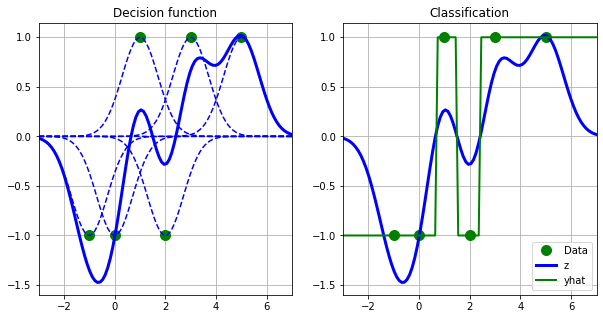

In [5]:
# Values of x and gamma to plot
nx = 100
x = np.linspace(-3,7,nx)
gam = 1

# Create the plots
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Plot the decision function 
ax[0].plot(xtr, ytr, 'go', ms=10)
z = np.zeros(nx)
for i, xi in enumerate(xtr):
    keri = ytr[i]*np.exp(-gam*(x-xi)**2)
    z = z + keri
    ax[0].plot(x,keri,'b--')
ax[0].plot(x,z,'b-', lw=3)

ax[0].set_xlim([-3,7])
ax[0].grid()
ax[0].set_title('Decision function')


# Plot the decision function and yhat
yhat = np.sign(z)
ax[1].plot(xtr, ytr, 'go', ms=10)
ax[1].plot(x,z,   'b-', lw=3)
ax[1].plot(x,yhat,'g-', lw=2)
ax[1].set_xlim([-3,7])
ax[1].grid()
ax[1].set_title('Classification')
ax[1].legend(['Data', 'z', 'yhat'], loc='lower right')

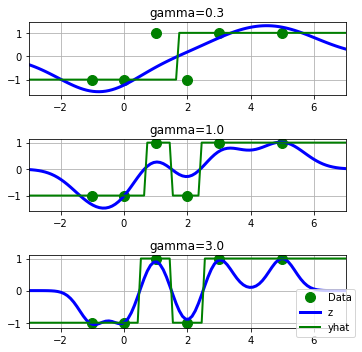

In [6]:
# Values of x and gamma to plot
nx = 100
x = np.linspace(-3,7,nx)
gam_plot = [0.3, 1, 3]
ngam = len(gam_plot)

# Create the plots
fig, ax = plt.subplots(ngam,1, figsize=(5,5))
for igam, gam in enumerate(gam_plot):

    # Plot the decision function 
    dsq = (x[:,None]-xtr[None,:])**2
    z = np.exp(-gam*dsq).dot(ytr)
    
    # Plot the decision function and yhat
    yhat = np.sign(z)
    ax[igam].plot(xtr, ytr, 'go', ms=10)
    ax[igam].plot(x,z,   'b-', lw=3)
    ax[igam].plot(x,yhat,'g-', lw=2)    
    ax[igam].set_xlim([-3,7])
    ax[igam].grid()
    ax[igam].set_title('gamma=%3.1f' % gam)
    
fig.tight_layout()
fig.legend(['Data','z','yhat'], borderaxespad=0.1, loc='lower right',
           bbox_to_anchor=(0, 0.05, 1, 0.95))
plt.tight_layout()
    

## Kernel Form of the SVM

Now consider an SVM classifier trained on data points `xtr[i], ytr[i]`, `i=0,...,ntr-1` with binary labels, `ytr[i] = -1` or `1`.   It can be shown that, given a new data point `x`, the classifier output is given by:

    z = b + sum_i alpha[i]*ytr[i]*K(xtr[i], x)
    yhat = sign(z)
    
The classifier is similar to the kernel classifier, but with two differences:

*  There are weights `alpha[i] >= 0`.  These are called the *dual coefficients*. 
*  There is a bias or intercept term `b`.

Both `alpha[i]` and `b` are found from training to minimize the SVM cost function.  As discussed in class, this function includes both the hinge loss and margin.  

To illustrate the SVM, we plot the decision function and classifier rule for the SVM trained on the 1D data as before.  We use different values of `gamma`.   We see the same general trends as the kernel classifier.

NameError: name 'xp' is not defined

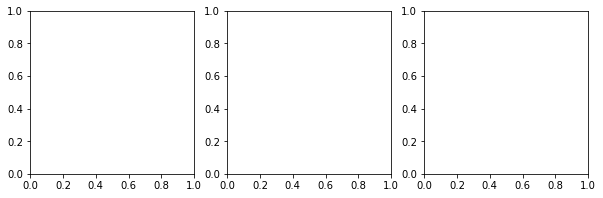

In [7]:
fig, ax = plt.subplots(1,nplot,figsize=(10,3))

for i, gam in enumerate(gam_plot):
    # Fit the SVC
    svc = SVC(C=1,kernel='rbf',gamma=gam)
    svc.fit(xtr[:,None],ytr)
    
    # Compute decision function and yhat
    z = svc.decision_function(xp[:,None])
    yhat = np.sign(z)    
    
    # Plot
    ax[i].plot(xtr, ytr,'go')    
    ax[i].plot(xp, z, 'b-', lw=2)    
    ax[i].plot(xp, yhat, 'g-', lw=2)
    ax[i].grid()
    ax[i].set_xlabel('x')
    title = 'gamma = %5.1f' % gam
    ax[i].set_title(title)
    ax[i].set_xlim([-3,7])
    
fig.legend(['Data','z','yhat'], borderaxespad=0.1, loc='lower right',
           bbox_to_anchor=(0, 0.2, 1, 0.8))
plt.tight_layout()


Now we consider a 2D case.  We use the following simple data points.

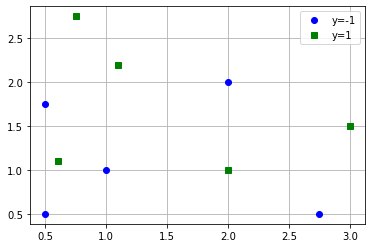

In [ ]:
Xtr = np.array([[0.5,0.5], [0.6,1.1], [1,1],[0.5,1.75], [2.75,0.5],[2,2], [0.75,2.75], [1.1,2.2], [2,1], [3,1.5]])
ytr = np.array([-1,1,-1,-1,-1,-1,1,1,1,1])

I0 = np.where(ytr==-1)[0]
I1 = np.where(ytr==1)[0]
plt.plot(Xtr[I0,0], Xtr[I0,1],'bo')
plt.plot(Xtr[I1,0], Xtr[I1,1],'gs')
plt.grid()
plt.legend(['y=-1', 'y=1'])

To plot the decision functions we create a set of points on a grid to plot the functions.

In [ ]:
n0 = 100
n1 = 100
xmax = 3
x0p = np.linspace(0,xmax,n0)
x1p = np.linspace(0,xmax,n1)
xmat0, xmat1 = np.meshgrid(x0p, x1p)

Xp = np.column_stack((xmat0.ravel(), xmat1.ravel()))

We now fit the SVM for different values of `gamma`.  For each value, we plot the decision function `z` and classification decision `yhat` as a function of `x`.  We see that as `gamma` increases the `z` begins to fit the data better.  

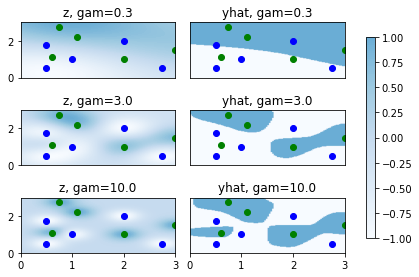

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

blue_map = cm.get_cmap('Blues')
light_map = ListedColormap(blue_map(np.linspace(0,0.5,100)))

gam_test = [0.3,3, 10]
ngam = len(gam_test)
fig, ax = plt.subplots(ngam,2)

for irow, gam in enumerate(gam_test):
    # Fit the SVC
    svc = SVC(C=1,kernel='rbf',gamma=gam)
    svc.fit(Xtr, ytr)
    
    # Compute decision function and yhat
    z = svc.decision_function(Xp)
    yhat = np.sign(z)    
    
    # Plot
    for icol, yp in enumerate([z,yhat]):
        ymat = yp.reshape((n0,n1))

        im = ax[irow,icol].imshow(np.flipud(ymat), extent=[0,xmax,0,xmax],\
                                  aspect='auto', cmap=light_map)
        
        ax[irow,icol].plot(Xtr[I0,0], Xtr[I0,1],'bo')
        ax[irow,icol].plot(Xtr[I1,0], Xtr[I1,1],'go')
        if icol == 1:
            title = 'yhat, gam=%3.1f' % gam
            ax[irow,icol].set_yticks([])
        else:
            title = 'z, gam=%3.1f' % gam
        ax[irow,icol].set_title(title)
        if irow < ngam-1:
            ax[irow,icol].set_xticks([])
        
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.85) 
cb_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
plt.colorbar(im, cax=cb_ax)        